In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [177]:
path = 'C:\\Users\\Peter\Desktop\\Thinkful\\Thinkful-Lessons\\Thinkful 3.3 Advanced Regression\\Table_8_Offenses_Known_to_Law_Enforcement_by_State_by_City_2013.xls'
df = pd.read_excel(path, header = 3, skip_footer = 10)

In [178]:
cols = list(df.loc[:,'City':'Arson3'])
df = df[cols]
df.columns = ['City', 'Population', 'Violent_Crime',
       'Murder_manslaughter',
       'Rape1', 'Rape2',
       'Robbery', 'Agg_ass', 'Property_Crime', 'Burglary',
       'Larceny_Theft', 'Motor_Theft', 'Arson3']

In [179]:
(df.isnull().sum()/len(df))*100

City                    0.000000
Population              0.032286
Violent_Crime           0.043048
Murder_manslaughter     0.000000
Rape1                  41.551873
Rape2                  58.469651
Robbery                 0.000000
Agg_ass                 0.032286
Property_Crime          0.043048
Burglary                0.021524
Larceny_Theft           0.021524
Motor_Theft             0.000000
Arson3                  5.090400
dtype: float64

In [180]:
df.dropna().shape[0]/df.shape[0]

0.0

In [181]:
if 'Rape1' in df.columns:df["Rape"] = df["Rape1"].fillna(df["Rape2"])
if 'Rape1' in df.columns: del df['Rape1']
if 'Rape2' in df.columns: del df['Rape2']

In [182]:
df['Arson3'] = df['Arson3'].fillna(0.0)

In [183]:
df = df.dropna()

In [184]:
(df.isnull().sum()/len(df))*100

City                   0.0
Population             0.0
Violent_Crime          0.0
Murder_manslaughter    0.0
Robbery                0.0
Agg_ass                0.0
Property_Crime         0.0
Burglary               0.0
Larceny_Theft          0.0
Motor_Theft            0.0
Arson3                 0.0
Rape                   0.0
dtype: float64

In [185]:
crimedata = list(df.loc[:,'Violent_Crime':'Arson3'])

In [186]:
df['Total_crimes'] = df[crimedata].sum(axis = 1)

In [187]:
df['Crime_per_capita']= df['Total_crimes']/df['Population']

In [188]:
df['Crime_per_capita'].argmax()

980

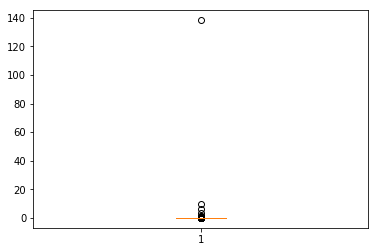

In [189]:
plt.boxplot(df['Crime_per_capita'])
plt.show()

In [190]:
df.ix[df['Crime_per_capita'].argmax()]

City                   Lakeside
Population                    8
Violent_Crime                 5
Murder_manslaughter           0
Robbery                       3
Agg_ass                       2
Property_Crime              548
Burglary                      0
Larceny_Theft               548
Motor_Theft                   0
Arson3                        0
Rape                          0
Total_crimes               1106
Crime_per_capita         138.25
Name: 980, dtype: object

In [191]:
#Lakeside looks like bad data, population of 8 with 138 crimes, we should do away with that
df.drop(980, inplace = True)

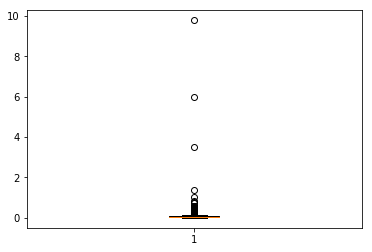

In [192]:
plt.boxplot(df['Crime_per_capita'])
plt.show()

In [206]:
#Still looks off, lets see how many cities have a crime per capita greater than 1
df[df['Crime_per_capita']>1].Crime_per_capita.count()

5

In [207]:
df[df['Crime_per_capita']>1].index

Int64Index([627, 870, 909, 2183, 3526], dtype='int64')

In [209]:
df = df.drop([627, 870, 909, 2183, 3526])

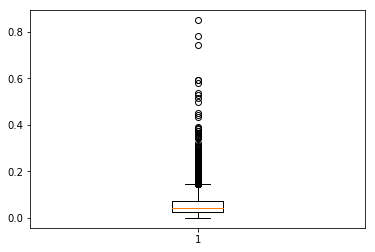

In [210]:
plt.boxplot(df['Crime_per_capita'])
plt.show()

In [211]:
df['Crime_per_capita'].describe()

count    9275.000000
mean        0.055357
std         0.048109
min         0.000000
25%         0.024772
50%         0.044111
75%         0.072723
max         0.850202
Name: Crime_per_capita, dtype: float64

In [215]:
#Seems almost 2% of the cities in our database have no reported crime.  I'd like to live in one of those cities
df[df['Crime_per_capita']==0].Crime_per_capita.count()/len(df)

0.017574123989218329

In [217]:
#OK, so lets make a target variable.  Lets say that cities with per capita crime rate less than 0.024772 are 'Safe Cities', top25%
df['Safe_City'] = np.where(df['Crime_per_capita']<=0.024772, 1, 0)

In [234]:
from sklearn.model_selection import train_test_split
y = df['Safe_City']
X = df[crimedata]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [256]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)
fit = lr.fit(X_train, y_train)

print('Coefficients')
print(pd.DataFrame(fit.coef_, columns=crimedata))
print('\nIntercept:{}'.format(fit.intercept_))


print('\n Percentage accuracy training set')
print(lr.score(X_train, y_train))

print('\n Percentage accuracy testing set')
print(lr.score(X_test, y_test))

pred_y_sklearn = lr.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))

Coefficients
   Violent_Crime  Murder_manslaughter   Robbery   Agg_ass  Property_Crime  \
0       0.013258             0.012683  0.001086 -0.097657       -0.009037   

   Burglary  Larceny_Theft  Motor_Theft   Arson3  
0 -0.006469        0.00408    -0.006648  0.07914  

Intercept:[ 0.28250173]

 Percentage accuracy training set
0.828984257063

 Percentage accuracy testing set
0.825786977145

 Accuracy City Safety on Test Set
Safe_City     0    1
row_0               
0          3238  586
1           222  592


In [254]:
lrlasso = LogisticRegression(penalty ='l1')
fit = lrlasso.fit(X_train, y_train)

print('Coefficients')
print(pd.DataFrame(fit.coef_, columns=crimedata))
print('\nIntercept:{}'.format(fit.intercept_))


print('\n Percentage accuracy training set')
print(lrlasso.score(X_train, y_train))

print('\n Percentage accuracy testing set')
print(lrlasso.score(X_test, y_test))

pred_y_sklearn = lrlasso.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))

Coefficients
   Violent_Crime  Murder_manslaughter  Robbery   Agg_ass  Property_Crime  \
0       0.004296             0.017491  0.01161 -0.088351       -0.000726   

   Burglary  Larceny_Theft  Motor_Theft    Arson3  
0 -0.014547      -0.004161    -0.015994  0.080809  

Intercept:[ 0.28130361]

 Percentage accuracy training set
0.829846883761

 Percentage accuracy testing set
0.825140146615

 Accuracy City Safety on Test Set
Safe_City     0    1
row_0               
0          3240  591
1           220  587


In [255]:
lrridge = LogisticRegression(penalty ='l2')
fit = lrridge.fit(X_train, y_train)

print('Coefficients')
print(pd.DataFrame(fit.coef_, columns=crimedata))
print('\nIntercept:{}'.format(fit.intercept_))


print('\n Percentage accuracy training set')
print(lrridge.score(X_train, y_train))

print('\n Percentage accuracy testing set')
print(lrridge.score(X_test, y_test))

pred_y_sklearn = lrridge.predict(X_test)
print('\n Accuracy City Safety on Test Set')
print(pd.crosstab(pred_y_sklearn, y_test))

Coefficients
   Violent_Crime  Murder_manslaughter   Robbery   Agg_ass  Property_Crime  \
0       0.013099             0.012748  0.001667 -0.098067       -0.009204   

   Burglary  Larceny_Theft  Motor_Theft    Arson3  
0 -0.006112       0.004279    -0.007371  0.079114  

Intercept:[ 0.28162767]

 Percentage accuracy training set
0.829199913737

 Percentage accuracy testing set
0.824924536438

 Accuracy City Safety on Test Set
Safe_City     0    1
row_0               
0          3237  589
1           223  589
